# 溫度預報資料集

In [1]:
#導入函式
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#匯入資料(csv需儲存在同資料夾下)
data = pd.read_csv('Bias_correction_ucl.csv')

In [3]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# 前置處理

In [5]:
#將資料中含?的資料列刪除
data=data.replace(' ?', np.NaN)
data.dropna(inplace=True)

In [6]:
#將資料集內之浮點數轉整數，以及將日期欄位轉成數字，以方便計算
labelencoder = LabelEncoder()
for i in range(len(data.columns)):
    if data[data.columns[i]].dtypes==float:
        data[data.columns[i]] =data[data.columns[i]].astype(np.int64)
    if data[data.columns[i]].dtypes==object:
            data[data.columns[i]] = labelencoder.fit_transform(data[data.columns[i]]).astype(np.int64)

In [7]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1,0,28,21,58,91,28,23,6,69,...,0,0,0,37,126,212,2,5992,29,21
1,2,0,31,21,52,90,29,24,5,51,...,0,0,0,37,127,44,0,5869,30,22
2,3,0,31,23,48,83,30,24,6,20,...,0,0,0,37,127,33,0,5863,31,23
3,4,0,32,23,58,96,29,23,5,65,...,0,0,0,37,127,45,2,5856,31,24
4,5,0,31,21,56,90,29,23,5,107,...,0,0,0,37,127,35,0,5859,31,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21,306,23,17,24,78,27,18,6,9,...,0,0,0,37,127,26,0,4456,27,17
7746,22,306,22,17,30,83,26,17,5,82,...,0,0,0,37,127,21,0,4441,28,17
7747,23,306,23,17,26,78,26,18,6,72,...,0,0,0,37,126,15,0,4443,28,18
7748,24,306,23,17,24,77,27,18,6,47,...,0,0,0,37,126,17,0,4438,28,18


In [8]:
#因為Solar radiation是之後要預測的變數，所以將X的Solar radiation欄位刪除
X = data.drop('Solar radiation',axis=1)
#將Solar radiation欄位給y
y = data['Solar radiation']

In [9]:
#隨機切分資料
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=666)

In [10]:
#資料正規化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

X_test = ss.fit_transform(X_test)

In [11]:
#查看資料型態
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   station           7588 non-null   int64
 1   Date              7588 non-null   int64
 2   Present_Tmax      7588 non-null   int64
 3   Present_Tmin      7588 non-null   int64
 4   LDAPS_RHmin       7588 non-null   int64
 5   LDAPS_RHmax       7588 non-null   int64
 6   LDAPS_Tmax_lapse  7588 non-null   int64
 7   LDAPS_Tmin_lapse  7588 non-null   int64
 8   LDAPS_WS          7588 non-null   int64
 9   LDAPS_LH          7588 non-null   int64
 10  LDAPS_CC1         7588 non-null   int64
 11  LDAPS_CC2         7588 non-null   int64
 12  LDAPS_CC3         7588 non-null   int64
 13  LDAPS_CC4         7588 non-null   int64
 14  LDAPS_PPT1        7588 non-null   int64
 15  LDAPS_PPT2        7588 non-null   int64
 16  LDAPS_PPT3        7588 non-null   int64
 17  LDAPS_PPT4        7588 non-null  

# RandomForest Regression

In [12]:
#創建隨機森林回歸模型
ran_for = RandomForestRegressor(n_estimators = 100, max_depth = 18, random_state = 42)
ran_for.fit(X_train, y_train.values)

RandomForestRegressor(max_depth=18, random_state=42)

In [13]:
ran_for.score(X_test, y_test)

0.884128469353521

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#對測試數據進行預測(隨機森林)
prediction = ran_for.predict(X_test)

#計算均方誤差
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))

準確率： 99.14 %.
MSE： 21447.35
MAE： 42.43
RMSE： 146.45
MAPE： 0.01


# KNN

In [ ]:
ks = [] 
score = [] 
k_range = range(1, 40)
k_error = []
for k in k_range:  # 窮舉k值在1~40中的數
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    k_error.append(1-scores)
    ks.append(k)
    score.append(scores)
plt.bar(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()
arr_ks = np.array(ks)
arr_scores = np.array(score)
arr_ks,arr_scores
np.argmax(arr_scores) 
arr_ks[np.argmax(arr_scores)]

In [15]:
# 建立 KNN 模型
knnModel = KNeighborsRegressor(n_neighbors=6)
# 使用訓練資料訓練模型
knnModel.fit(X_train,y_train)
# 使用訓練資料預測
prediction= knnModel.predict(X_test)

In [16]:
knnModel.score(X_test,y_test)

0.46641027967377024

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#計算均方誤差
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

#print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))

準確率： 95.59 %.
MAE： 230.77
RMSE： 314.27
MAPE： 0.04


# SVR

In [18]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
# 建立 kernel='linear' 模型
linearModel=svm.SVR(C=3, kernel='linear')
# 使用訓練資料訓練模型
linearModel.fit(X_train, y_train)
# 使用訓練資料預測分類
prediction=linearModel.predict(X_test)

#計算均方誤差
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))

準確率： 93.86 %.
MSE： 151458.48
MAE： 322.18
RMSE： 389.18
MAPE： 0.06


# 特徵重要性

Feature: 0, Score: 0.00084
Feature: 1, Score: 0.89265
Feature: 2, Score: 0.00816
Feature: 3, Score: 0.02013
Feature: 4, Score: 0.00377
Feature: 5, Score: 0.00179
Feature: 6, Score: 0.00074
Feature: 7, Score: 0.06200
Feature: 8, Score: 0.00129
Feature: 9, Score: 0.00066
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00024
Feature: 15, Score: 0.00099
Feature: 16, Score: 0.00014
Feature: 17, Score: 0.00154
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00008
Feature: 20, Score: 0.00258
Feature: 21, Score: 0.00046
Feature: 22, Score: 0.00101
Feature: 23, Score: 0.00092


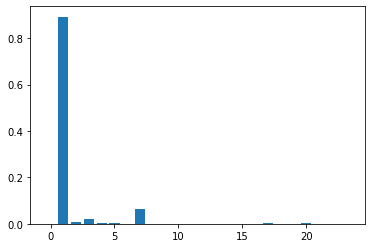

In [22]:
#特徵重要性
from matplotlib import pyplot
importance = ran_for.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

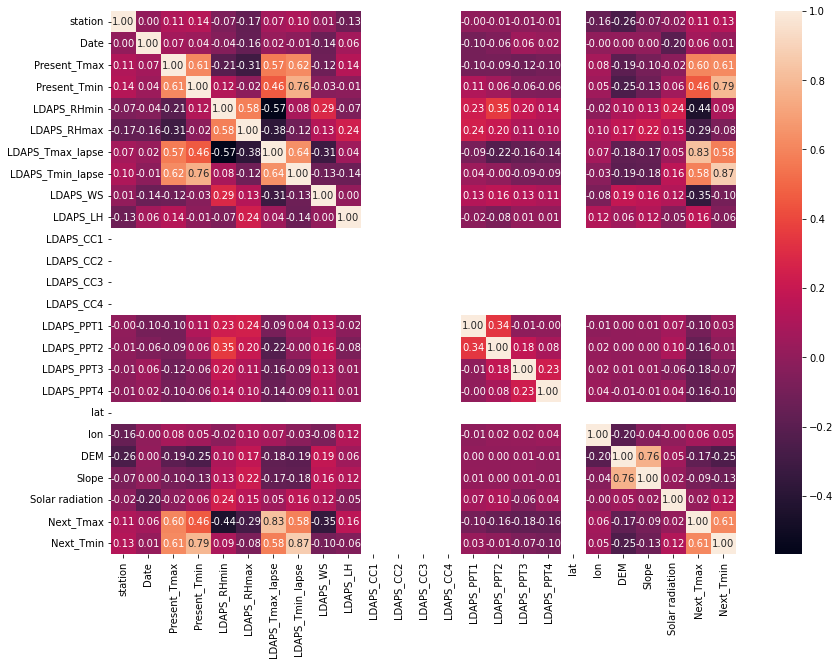

In [23]:
#相關的特徵：數字越高，相關性越高
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

# 刪除特徵

In [19]:
data=data.drop(['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT3','lat','lon','Slope'],axis=1)

In [20]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT2,LDAPS_PPT4,DEM,Solar radiation,Next_Tmax,Next_Tmin
0,1,0,28,21,58,91,28,23,6,69,0,0,212,5992,29,21
1,2,0,31,21,52,90,29,24,5,51,0,0,44,5869,30,22
2,3,0,31,23,48,83,30,24,6,20,0,0,33,5863,31,23
3,4,0,32,23,58,96,29,23,5,65,0,0,45,5856,31,24
4,5,0,31,21,56,90,29,23,5,107,0,0,35,5859,31,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21,306,23,17,24,78,27,18,6,9,0,0,26,4456,27,17
7746,22,306,22,17,30,83,26,17,5,82,0,0,21,4441,28,17
7747,23,306,23,17,26,78,26,18,6,72,0,0,15,4443,28,18
7748,24,306,23,17,24,77,27,18,6,47,0,0,17,4438,28,18


In [21]:
#因為Solar radiation是之後要預測的變數，所以將X的Solar radiation欄位刪除
X = data.drop('Solar radiation',axis=1)
#將Solar radiation欄位給y
y = data['Solar radiation']

In [22]:
#隨機切分資料
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=666)

# 刪除特徵後-RandomForest Regression

In [87]:
#創建隨機森林回歸模型
ran_for = RandomForestRegressor(n_estimators = 100, max_depth = 19, random_state = 42)
ran_for.fit(X_train, y_train)

RandomForestRegressor(max_depth=19, random_state=42)

In [88]:
ran_for.score(X_test, y_test)

0.9938240288986613

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#對測試數據進行預測(隨機森林)
prediction = ran_for.predict(X_test)

#計算均方誤差
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))

準確率： 99.64 %.
MSE： 1143.15
MAE： 18.81
RMSE： 33.81
MAPE： 0.0


# 刪除特徵後-KNN

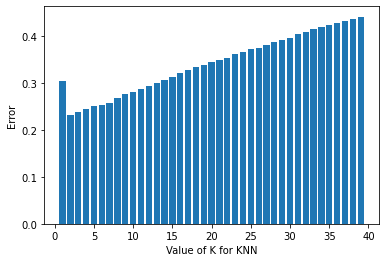

2

In [21]:
ks = [] 
score = [] 
k_range = range(1, 40)
k_error = []
for k in k_range:  # 窮舉k值在1~40中的數
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    k_error.append(1-scores)
    ks.append(k)
    score.append(scores)
plt.bar(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()
arr_ks = np.array(ks)
arr_scores = np.array(score)
arr_ks,arr_scores
np.argmax(arr_scores) 
arr_ks[np.argmax(arr_scores)]

In [25]:
# 建立 KNN 模型
knnModel = KNeighborsRegressor(n_neighbors=2)
# 使用訓練資料訓練模型
knnModel.fit(X_train,y_train)
# 使用訓練資料預測
prediction= knnModel.predict(X_test)

In [26]:
knnModel.score(X_test,y_test)

0.7682902558706516

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#計算均方誤差
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

#print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))

準確率： 98.14 %.
MAE： 96.39
RMSE： 207.1
MAPE： 0.02


# 刪除特徵後-SVR

In [25]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
# 建立 kernel='linear' 模型
linearModel=svm.SVR(C=1, kernel='linear')
# 使用訓練資料訓練模型
linearModel.fit(X_train, y_train)
# 使用訓練資料預測分類
prediction=linearModel.predict(X_test)

#計算均方誤差
mse = mean_squared_error(y_test, prediction)
#計算均方根誤差
rmse = mse**.5
#計算平均絕對誤差
mae = mean_absolute_error(y_test, prediction)
#計算平均絕對百分比誤差
mape = mean_absolute_percentage_error(y_test, prediction)
# 計算並顯示準確率
accuracy = 100 - mape*100
print('準確率：', round(accuracy, 2), '%.')

print('MSE：',round(mse,2))
print('MAE：',round(mae,2))
print('RMSE：',round(rmse,2))
print('MAPE：',round(mape,2))

準確率： 93.79 %.
MSE： 155370.72
MAE： 325.25
RMSE： 394.17
MAPE： 0.06
